In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,NaN,NaN,NaN,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,NaN,NaN,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,NaN,7.70,NaN,1.74,740
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,NaN,750
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,NaN,1.35,10.20,NaN,1.56,835
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,NaN,1.46,9.30,NaN,1.62,840


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	14
float64		column 3	7
float64		column 4	22
float64		column 5	21
float64		column 6	8
float64		column 7	29
float64		column 8	21
float64		column 9	29
float64		column 10	22
float64		column 11	14
float64		column 12	22
int64		column 13	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,171.000000,164.000000,171.000000,156.000000,157.000000,170.000000,149.000000,157.000000,149.000000,156.000000,164.000000,156.000000,178.000000
mean,13.018772,2.328171,2.364737,19.551282,99.726115,2.308118,2.029463,0.357197,1.593289,4.942885,0.962780,2.656346,746.893258
std,0.803319,1.104162,0.274469,3.172757,14.406912,0.623796,1.000571,0.120234,0.535651,2.158450,0.226189,0.702319,314.907474
min,11.030000,0.740000,1.360000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.370000,1.610000,2.210000,17.475000,88.000000,1.782500,1.220000,0.270000,1.280000,3.200000,0.800000,2.057500,500.500000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.400000,2.130000,0.330000,1.560000,4.750000,0.975000,2.815000,673.500000
75%,13.685000,3.030000,2.545000,21.500000,106.000000,2.800000,2.790000,0.430000,1.920000,6.000000,1.120000,3.200000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.280000,11.750000,1.710000,4.000000,1680.000000


<AxesSubplot:>

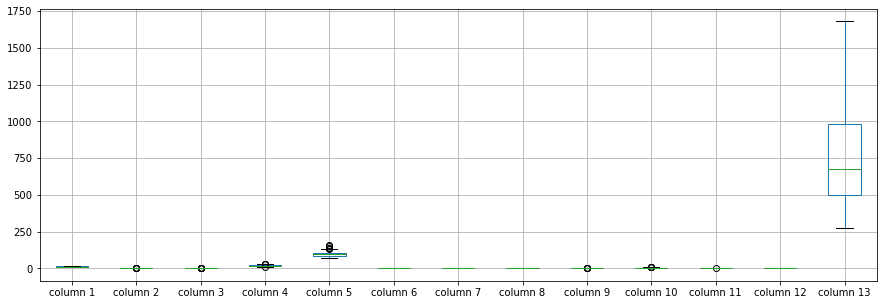

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.018772
column 2       2.328171
column 3       2.364737
column 4      19.551282
column 5      99.726115
column 6       2.308118
column 7       2.029463
column 8       0.357197
column 9       1.593289
column 10      4.942885
column 11      0.962780
column 12      2.656346
column 13    746.893258
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.109986,0.219731,-0.362454,0.250889,0.275632,0.221070,-0.195780,0.191130,0.517053,-0.093091,0.087730,0.653355
column 2,0.109986,1.000000,0.124920,0.224225,-0.112932,-0.338929,-0.381290,0.220939,-0.239916,0.316233,-0.551242,-0.420527,-0.191788
column 3,0.219731,0.124920,1.000000,0.381933,0.242823,0.125594,0.135440,0.107407,0.032641,0.240179,-0.067798,0.022484,0.207027
column 4,-0.362454,0.224225,0.381933,1.000000,-0.092786,-0.309126,-0.277060,0.377516,-0.219854,-0.141759,-0.193686,-0.249053,-0.441543
column 5,0.250889,-0.112932,0.242823,-0.092786,1.000000,0.177989,0.196937,-0.289353,0.265663,0.140341,0.082921,0.087044,0.396587
column 6,0.275632,-0.338929,0.125594,-0.309126,0.177989,1.000000,0.857031,-0.445064,0.594710,-0.055936,0.410454,0.686863,0.492788
column 7,0.221070,-0.381290,0.135440,-0.277060,0.196937,0.857031,1.000000,-0.534314,0.619483,-0.145787,0.471991,0.775795,0.465691
column 8,-0.195780,0.220939,0.107407,0.377516,-0.289353,-0.445064,-0.534314,1.000000,-0.364289,0.051216,-0.203990,-0.509923,-0.306335
column 9,0.191130,-0.239916,0.032641,-0.219854,0.265663,0.594710,0.619483,-0.364289,1.000000,-0.079250,0.319239,0.503942,0.328167
column 10,0.517053,0.316233,0.240179,-0.141759,0.140341,-0.055936,-0.145787,0.051216,-0.079250,1.000000,-0.515128,-0.405462,0.346040


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+80,13+80+80,13+80+80,13+80+80+80+80,13+80+80+80+80+80,13+80+80+80+80+80+80,13+80+80+80+80+80,13+80+80+80+80,13+80+80+80,13+80+80,13+80,13], vae_layer = False, seed = 800)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 948.8803877397017
Epoch: 1 , loss: 946.4316461736506
Epoch: 2 , loss: 943.4785655628551
Epoch: 3 , loss: 942.4441805752841
Epoch: 4 , loss: 945.4506558504971
Epoch: 5 , loss: 946.9564541903409
Epoch: 6 , loss: 939.8688742897727
Epoch: 7 , loss: 942.6509232954545
Epoch: 8 , loss: 939.0388128107244
Epoch: 9 , loss: 944.3852428089489
Epoch: 10 , loss: 944.042519309304
Epoch: 11 , loss: 934.7114535245029
Epoch: 12 , loss: 938.3410089666194
Epoch: 13 , loss: 940.3717706853694
Epoch: 14 , loss: 945.1924327503551
Epoch: 15 , loss: 940.8081387606534
Epoch: 16 , loss: 940.7394520152699
Epoch: 17 , loss: 931.920937278054
Epoch: 18 , loss: 930.6047030362216
Epoch: 19 , loss: 928.5621504350142
Epoch: 20 , loss: 930.2546719637784
Epoch: 21 , loss: 920.5959583629261
Epoch: 22 , loss: 930.2666293057529
Epoch: 23 , loss: 927.1813021573154
Epoch: 24 , loss: 927.5430575284091
Epoch: 25 , loss: 928.5478737571023
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.930000
column 2       3.800000
column 3       2.650000
column 4      18.600000
column 5     102.000000
column 6       2.410000
column 7       2.410000
column 8       0.250000
column 9       1.045961
column 10      4.500000
column 11      0.637701
column 12      3.520000
column 13    770.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,-1.701449,0.090619,-1.832382,0.000000,0.000000,0.000000,0
3,0.0,0.0,0.0,2.516868,-14.487709,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2.472817,0.000000,-0.332985,0.000000,0
174,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.483079,0
175,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.226450,0.000000,0.000000,3.245286,0.000000,0
176,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,-0.101925,0.000000,0.000000,0.157187,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(324.71319527499577, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.029795455156121375

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.600000,127.000000,2.80,3.060000,0.280000,2.290000,5.640000,1.040000,3.920000,1065
1,13.20,1.78,2.14,11.200000,100.000000,2.65,2.760000,0.260000,1.280000,4.380000,1.050000,3.400000,1050
2,13.16,2.36,2.67,18.600000,101.000000,2.80,1.538551,0.390619,0.977618,5.680000,1.030000,3.170000,1185
3,14.37,1.95,2.50,19.316868,98.512291,3.85,3.490000,0.240000,2.180000,7.800000,0.860000,3.450000,1480
4,13.24,2.59,2.87,21.000000,118.000000,2.80,2.690000,0.390000,1.820000,4.320000,1.040000,2.930000,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.500000,95.000000,1.68,0.610000,0.520000,3.532817,7.700000,0.307015,1.740000,740
174,13.40,3.91,2.48,23.000000,102.000000,1.80,0.750000,0.430000,1.410000,7.300000,0.700000,2.043079,750
175,13.27,4.28,2.26,20.000000,120.000000,1.59,0.690000,2.656450,1.350000,10.200000,3.835286,1.560000,835
176,13.17,2.59,2.37,20.000000,120.000000,1.65,0.680000,0.428075,1.460000,9.300000,0.757187,1.620000,840


In [20]:
imputations[-1].to_excel("Wine_NG_10(imp).xlsx", index=False, header=False)